In [43]:
import sys,os
os.environ['pRT_input_data_path'] = '/Users/nasedkin/python-packages/petitRADTRANS/petitRADTRANS/input_data/'
os.environ["OMP_NUM_THREADS"] = "1"
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
from petitRADTRANS.retrieval import plot_style as ps
import scicomap as sc
from astropy.io import fits
import pandas as pd
plt.rcParams['legend.title_fontsize'] = '20'

In [2]:
data_dir = "observations/"
qual_map = sc.ScicoQualitative(cmap='538')
fixed_cmap = qual_map.get_mpl_color_map()
colour_dict = {"HR8799b":fixed_cmap(3/6),
              "HR8799c":fixed_cmap(2/6),
              "HR8799d":fixed_cmap(1/6),
              "HR8799e":fixed_cmap(0/6)}
spectra = {}
distance_scale = (41.2925/10)**2
ylabel = r"F$_{\lambda}$ + offset [W/m$^{2}$/$\mu$m]"
xlabel = "Wavelength [micron]"
version = "v02"

In [103]:
retrievals_full = ["HR8799b_23_v02_diseq_all_scaleos_freeFeMgCloud_mrprior_newdata_newphot",
                   "HR8799c_23_v01_diseq_all_grav_eqFeMgamPatchyCloud_mr_fseds_newbins_newphot",
                   "HR8799d_23_v02_diseq_all_eqFeMgCloud_fseds_newconv_newphot_newSPHGPI_patchy",
                   "HR8799e_23_v02_diseq_all_eqFeMgCloud_newphot_newSPHGPI_mrprior_grad_fseds",
                   ]
retrievals_free = ["HR8799b_23_v04_free_all_correctos_freeConstMassFeMgCloud_grad_newphotv2_mrprior",
                   "HR8799c_23_v04_free_grav_noos_freeFeMgCloud_grad_newphot_newGPI_fseds_mr",
                   "HR8799d_23_v05_free_all_freeMgFeCloud_guillot_scaleALES_newSPHGPI_FeH",
                   "HR8799e_23_v02_free_all_freeFeMgCloud_grad_fseds_newphot_newconv_newSPHGPI",
                   ]
bulk_parameters = {}
bulk_parameters["HR8799b_23_v02_diseq_all_scaleos_freeFeMgCloud_mrprior_newdata_newphot"] = {"index":"b.", "M/H":r"$0.5\pm0.1$","C/O":r"$0.5\pm0.1$"}
bulk_parameters["HR8799c_23_v01_diseq_all_grav_eqFeMgamPatchyCloud_mr_fseds_newbins_newphot"] = {"index":"c.","M/H":r"$0.5\pm0.1$","C/O":r"$0.5\pm0.1$"}
bulk_parameters["HR8799d_23_v02_diseq_all_eqFeMgCloud_fseds_newconv_newphot_newSPHGPI_patchy"] = {"index":"d.","M/H":r"$0.5\pm0.1$","C/O":r"$0.5\pm0.1$"}
bulk_parameters["HR8799e_23_v02_diseq_all_eqFeMgCloud_newphot_newSPHGPI_mrprior_grad_fseds"] = {"index":"e.","M/H":r"$0.5\pm0.1$","C/O":r"$0.5\pm0.1$"}
bulk_parameters["HR8799b_23_v04_free_all_correctos_freeConstMassFeMgCloud_grad_newphotv2_mrprior"] = {"index":"b.","M/H":r"$0.5\pm0.1$","C/O":r"$0.5\pm0.1$"}
bulk_parameters["HR8799c_23_v04_free_grav_noos_freeFeMgCloud_grad_newphot_newGPI_fseds_mr"] = {"index":"c.","M/H":r"$0.5\pm0.1$","C/O":r"$0.5\pm0.1$"}
bulk_parameters["HR8799d_23_v05_free_all_freeMgFeCloud_guillot_scaleALES_newSPHGPI_FeH"] = {"index":"d.","M/H":r"$0.5\pm0.1$","C/O":r"$0.5\pm0.1$"}
bulk_parameters["HR8799e_23_v02_free_all_freeFeMgCloud_grad_fseds_newphot_newconv_newSPHGPI"] = {"index":"e.","M/H":r"$0.5\pm0.1$","C/O":r"$0.5\pm0.1$"}

ret_dir = "/Users/nasedkin/Documents/RetrievalResults/HR8799_2023_Retrievals/"
free_dirs =["b_free/", "c_free/", "d_free/", "e_free/"]
full_dirs =["b_full/", "c_full/", "d_full/", "e_full/"]

best_fit_specs_full = [np.load(f"{ret_dir}{full_dirs[i]}evaluate_{ret}/{ret}_bestfit_model_full.npy").T for i,ret in enumerate(retrievals_full)]
best_fit_specs_free = [np.load(f"{ret_dir}{free_dirs[i]}evaluate_{ret}/{ret}_bestfit_model_full.npy").T for i,ret in enumerate(retrievals_free)]

data_dir = "observations/"
qual_map = sc.ScicoQualitative(cmap='538')
fixed_cmap = qual_map.get_mpl_color_map()
ret_colour_dict = {"HR8799b":fixed_cmap(3/6),
              "HR8799c":fixed_cmap(2/6),
              "HR8799d":fixed_cmap(1/6),
              "HR8799e":fixed_cmap(0/6)}


In [104]:
best_fit_specs_free[0][1]-best_fit_specs_full[0][1]

array([-3.48902967e-17, -3.42084522e-17, -3.51378405e-17, ...,
        3.76050752e-19,  3.67849137e-19,  3.66887629e-19])

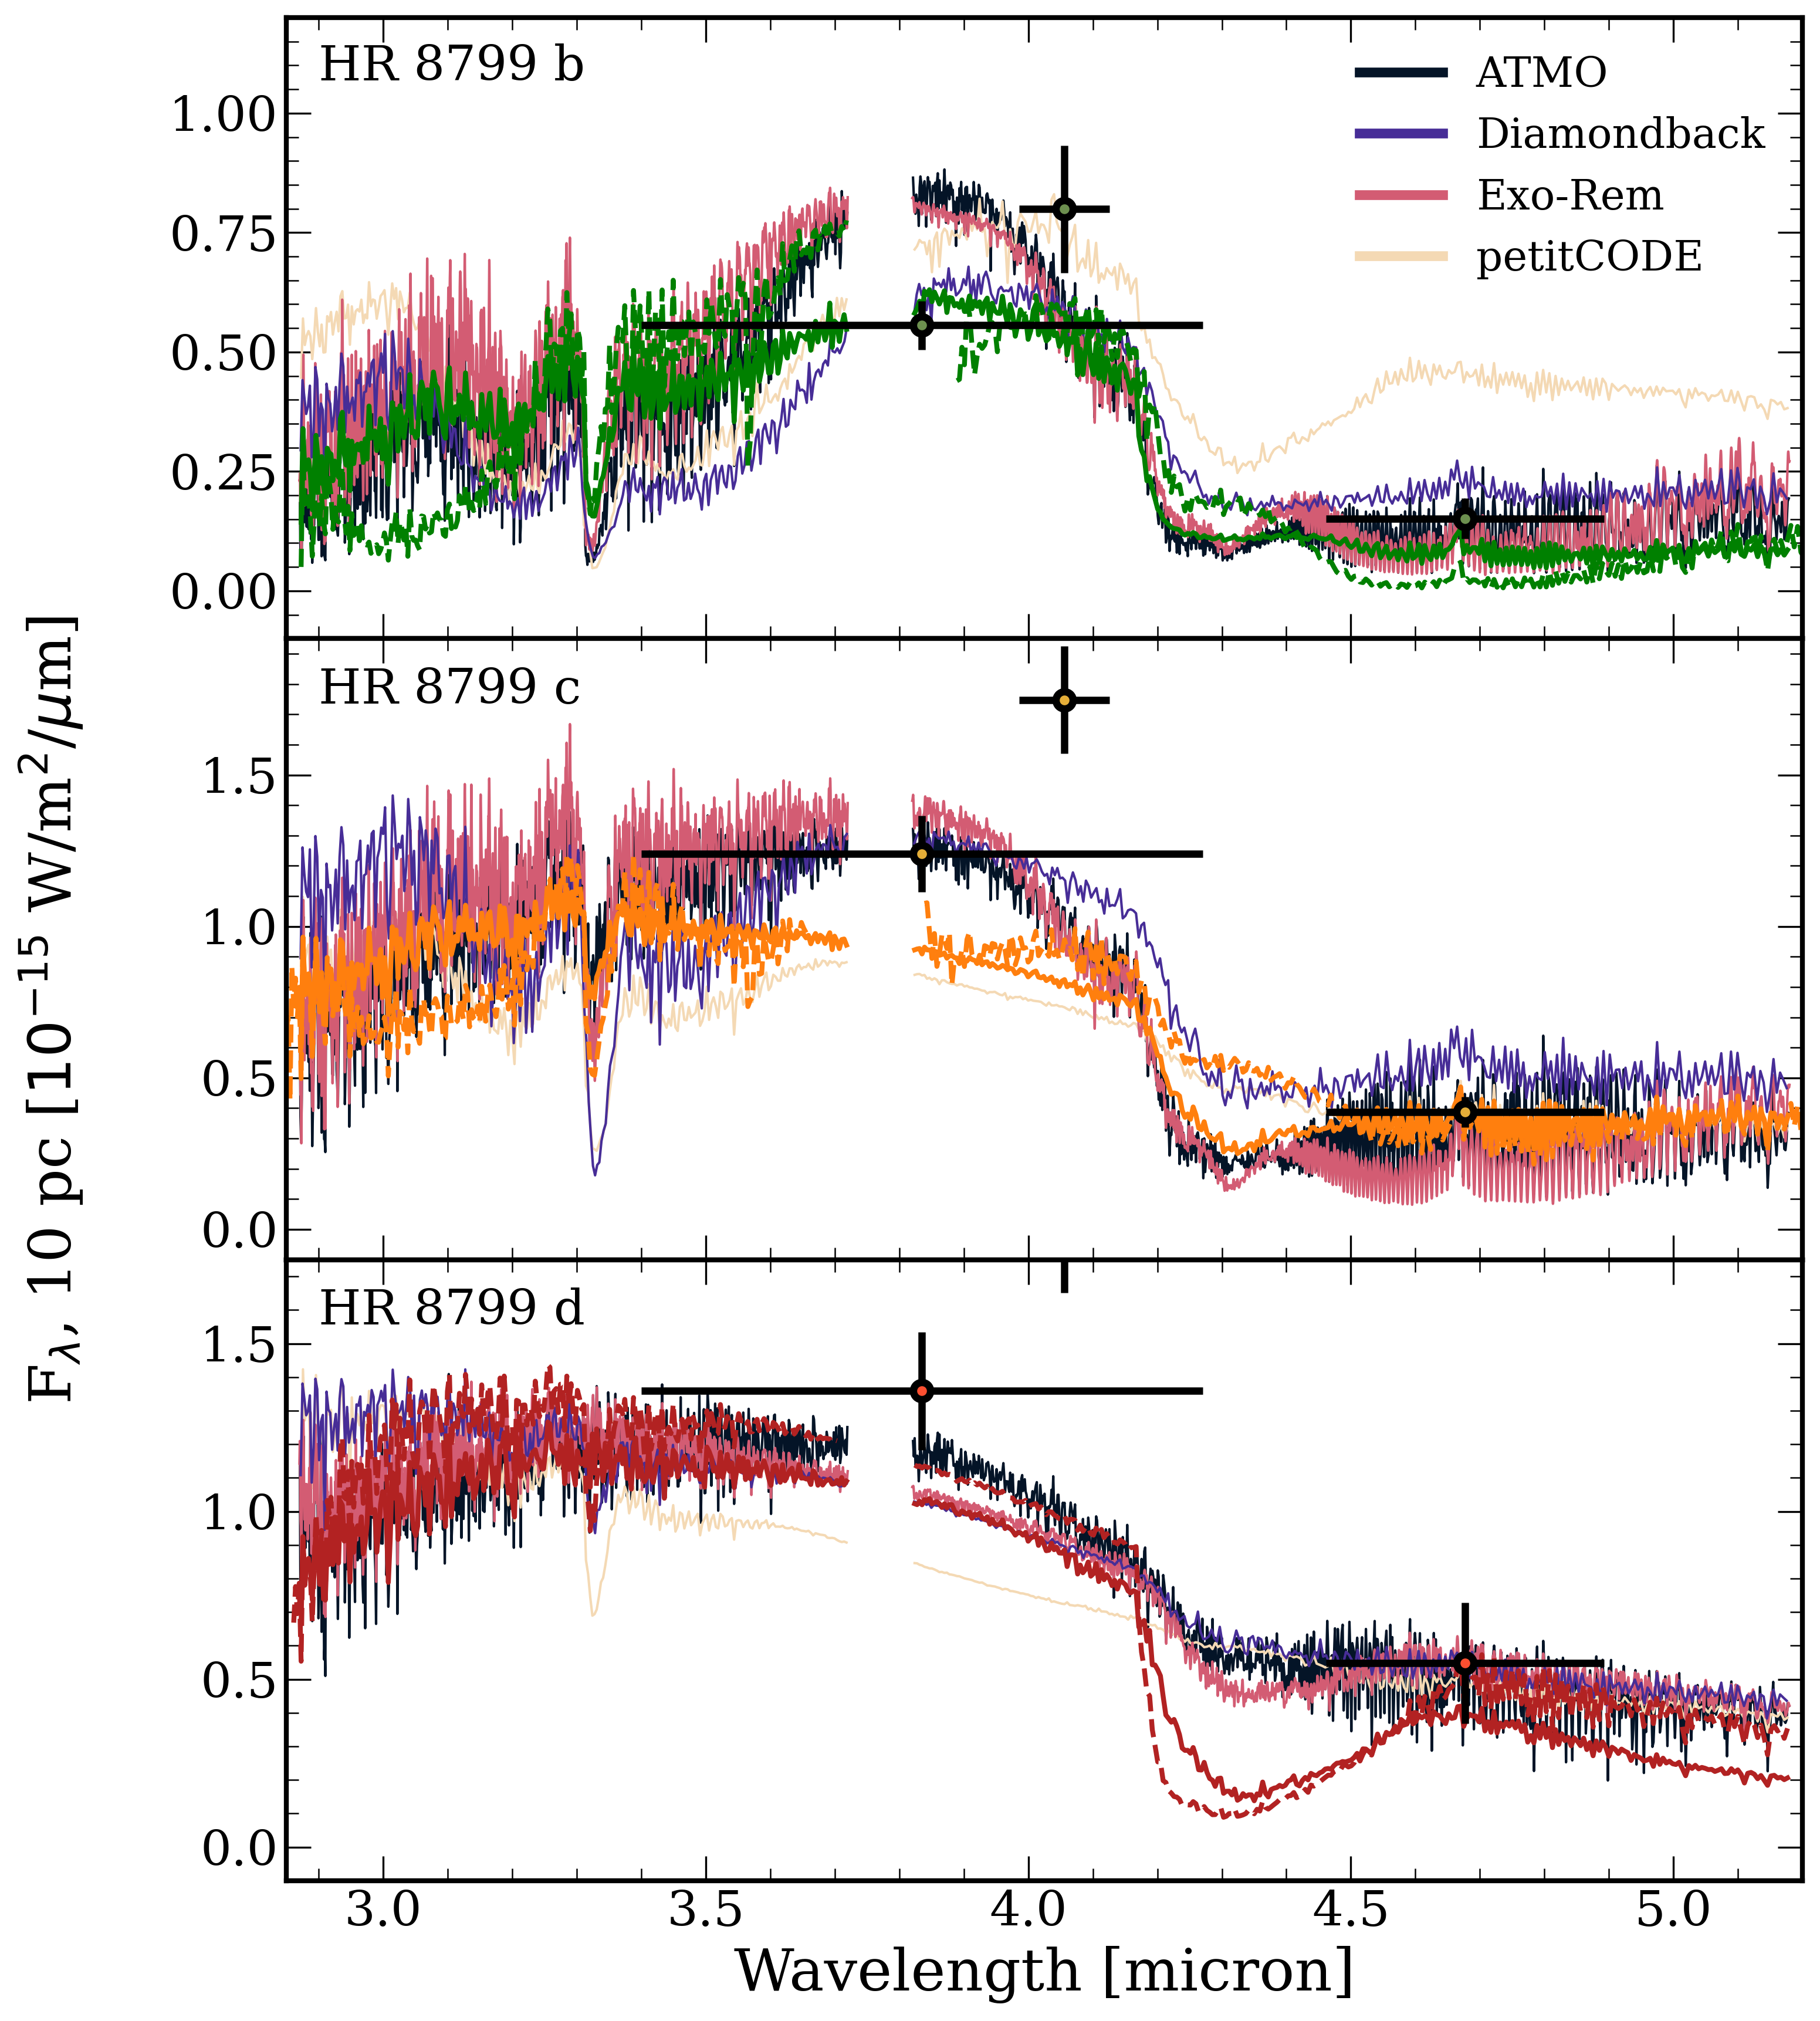

In [115]:
fig, axes = plt.subplots(nrows=3,figsize = (10,12),sharex = True, gridspec_kw={'hspace':0})
ax = axes.flatten()
instruments = ['SPHERE', 'CHARIS', 'GPI', 'GRAVITY', 'ALES', 'OSIRIS']
planets = ["HR8799b","HR8799c","HR8799d","HR8799e"]
ax[2].set_xlabel('Wavelength [micron]',fontsize = 24)
fig.text(-0.05, 0.5, r'F$_{\lambda}$, 10 pc [$10^{-15}$ W/m$^{2}$/$\mu$m]', va='center', rotation='vertical', fontsize = 24)

model_dir = "/Users/nasedkin/Documents/Paper2_HR8799_Notebooks/grid_fit_spectra/"

qual_map = sc.ScicoSequential(cmap='heat')
fixed_cmap = qual_map.get_mpl_color_map()
model_colour_dict = {"exo-rem":fixed_cmap(6/10),
                     "diamondback":fixed_cmap(3/10),
                     "petrus2023":fixed_cmap(1/10),
                     "petitcode-hot-cloudy":fixed_cmap(9/10),
                     "petitcode-cool-cloudy":fixed_cmap(9/10)}

bfiles = sorted(glob(f"{model_dir}*HR 8799 b*"))
bfiles.reverse()
for f in bfiles:
        if not "3500" in f : continue
        if not "fitcorr" in f:continue
        if "cholla" in f:continue
        if "bobcat" in f:continue
        if not "BestFitChi2" in f:continue
        if 'petitcode-hot-cloudy' in f:continue

        wlen,spec = np.genfromtxt(f).T
        inds_short = np.where((wlen>2.87) & (wlen <3.72))
        inds_long = np.where((wlen>3.82) & (wlen <5.18))
        model_name = f.split('/')[-1].split('_')[1]
        model_color = model_colour_dict[model_name]
        ax[0].plot(wlen[inds_short],spec[inds_short]*distance_scale/1e-15, color = model_color, linewidth = 1, alpha = 1)
        ax[0].plot(wlen[inds_long],spec[inds_long]*distance_scale/1e-15, color = model_color, linewidth = 1, alpha = 1)

        wlen_old = wlen

cfiles = sorted(glob(f"{model_dir}*HR 8799 c*")) 
cfiles.reverse()

for f in cfiles:
        #if "3500" in f: continue
        if not "3500" in f : continue
        if not "fitcorr" in f:continue
        if not "newales" in f:continue
        if "cholla" in f:continue
        if "bobcat" in f:continue
        if not "BestFitChi2" in f:continue
        wlen,spec = np.genfromtxt(f).T
        inds_short = np.where((wlen>2.87) & (wlen <3.72))
        inds_long = np.where((wlen>3.82) & (wlen <5.18))

        #if "3500" in f and "diamondback in f": 
        #        spec = spectres(wlen_old,wlen,spec)
        #        wlen = wlen_old
        model_name = f.split('/')[-1].split('_')[1]
        model_color = model_colour_dict[model_name]
        ax[1].plot(wlen[inds_short],spec[inds_short]*distance_scale/1e-15, color = model_color, linewidth = 1, alpha = 1)
        ax[1].plot(wlen[inds_long],spec[inds_long]*distance_scale/1e-15, color = model_color, linewidth = 1, alpha = 1)

        wlen_old = wlen
dfiles = sorted(glob(f"{model_dir}*HR 8799 d*"))
dfiles.reverse()

for f in dfiles:
        if not "3500" in f: continue
        if not "fitcorr" in f:continue
        if not "newales" in f:continue
        if not "scaled" in f:continue
        if not "BestFit" in f:continue
        if "cholla" in f:continue
        if "bobcat" in f:continue
        if 'petrus' in f:
                if not "BestFitChi2" in f:continue

        width = 1
        wlen,spec = np.genfromtxt(f).T
        inds_short = np.where((wlen>2.87) & (wlen <3.72))
        inds_long = np.where((wlen>3.82) & (wlen <5.18))

        model_name = f.split('/')[-1].split('_')[1]
        model_color = model_colour_dict[model_name]
        ax[2].plot(wlen[inds_short],spec[inds_short]*distance_scale/1e-15, color = model_color, linewidth = width, alpha = 1)
        ax[2].plot(wlen[inds_long],spec[inds_long]*distance_scale/1e-15, color = model_color, linewidth = width, alpha = 1)

inds_short = np.where((best_fit_specs_full[0][0]>2.87) & (best_fit_specs_full[0][0] <3.72))[0]
inds_long = np.where((best_fit_specs_full[0][0]>3.82) & (best_fit_specs_full[0][0] <5.18))[0]
ax[0].plot(best_fit_specs_full[0][0,inds_short],
           best_fit_specs_full[0][1,inds_short]/1e-15, 
           color = 'green', 
           linewidth =2)
ax[0].plot(best_fit_specs_full[0][0,inds_long],
           best_fit_specs_full[0][1,inds_long]/1e-15, 
           color = 'green', 
           linewidth =2)
inds_short = np.where((best_fit_specs_full[1][0]>2.87) & (best_fit_specs_full[1][0] <3.72))[0]
inds_long = np.where((best_fit_specs_full[1][0]>3.82) & (best_fit_specs_full[1][0] <5.18))[0]
ax[1].plot(best_fit_specs_full[1][0,inds_short],
           best_fit_specs_full[1][1,inds_short]/1e-15, 
           color = 'tab:orange', 
           linewidth =2)
ax[1].plot(best_fit_specs_full[1][0,inds_long],
           best_fit_specs_full[1][1,inds_long]/1e-15, 
           color = 'tab:orange', 
           linewidth =2)
inds_short = np.where((best_fit_specs_full[2][0]>2.87) & (best_fit_specs_full[2][0] <3.72))[0]
inds_long = np.where((best_fit_specs_full[2][0]>3.82) & (best_fit_specs_full[2][0] <5.18))[0]
ax[2].plot(best_fit_specs_full[2][0,inds_short],
           best_fit_specs_full[2][1,inds_short]/1e-15, 
           color = 'firebrick', 
           linewidth =2)
ax[2].plot(best_fit_specs_full[2][0,inds_long],
           best_fit_specs_full[2][1,inds_long]/1e-15, 
           color = 'firebrick', 
           linewidth =2)        

inds_short = np.where((best_fit_specs_free[0][0]>2.87) & (best_fit_specs_free[0][0] <3.72))[0]
inds_long = np.where((best_fit_specs_free[0][0]>3.82) & (best_fit_specs_free[0][0] <5.18))[0]
ax[0].plot(best_fit_specs_free[0][0,inds_short],
           best_fit_specs_free[0][1,inds_short]/1e-15, 
           color = 'green', 
           linestyle = "--",
           linewidth =2)
ax[1].plot(best_fit_specs_free[1][0,inds_short],
           best_fit_specs_free[1][1,inds_short]/1e-15, 
           color = 'tab:orange',
           linestyle = "--", 
           linewidth =2)
inds_short = np.where((best_fit_specs_free[1][0]>2.87) & (best_fit_specs_free[1][0] <3.72))[0]
inds_long = np.where((best_fit_specs_free[1][0]>3.82) & (best_fit_specs_free[1][0] <5.18))[0]
ax[2].plot(best_fit_specs_free[2][0,inds_short],
           best_fit_specs_free[2][1,inds_short]/1e-15, 
           color = 'firebrick', 
           linestyle = "--",
           linewidth =2)
ax[0].plot(best_fit_specs_free[0][0,inds_long],
           best_fit_specs_free[0][1,inds_long]/1e-15, 
           color = 'green', 
           linestyle = "--",
           linewidth =2)
inds_short = np.where((best_fit_specs_free[2][0]>2.87) & (best_fit_specs_free[2][0] <3.72))[0]
inds_long = np.where((best_fit_specs_free[2][0]>3.82) & (best_fit_specs_free[2][0] <5.18))[0]
ax[1].plot(best_fit_specs_free[1][0,inds_long],
           best_fit_specs_free[1][1,inds_long]/1e-15, 
           color = 'tab:orange', 
           linestyle = "--",
           linewidth =2)
ax[2].plot(best_fit_specs_free[2][0,inds_long],
           best_fit_specs_free[2][1,inds_long]/1e-15, 
           color = 'firebrick', 
           linestyle = "--",
           linewidth =2)
df = pd.read_csv("/Users/nasedkin/Documents/RetrievalResults/HR8799_2023_Retrievals/observations/hr8799b_photometry_updated_v2.txt",
                delimiter = ',',
                skiprows=1)
center = (df[" w_low"]+df[" w_high"])/2
lowerr = center- df[" w_low"]
higherr = df[" w_high"] - center
ax[0].errorbar(center, 
                df[" flux"]/1e-15, 
                xerr = [lowerr,higherr],
                yerr = df[" error"]/1e-15,
                linewidth = 0,
                elinewidth = 3,
                color=ret_colour_dict["HR8799b"],
                markeredgecolor='k',
                marker = 'o',
                ecolor='k',
                markeredgewidth = 3,
                markersize = 7,
                zorder = 10)

df = pd.read_csv("/Users/nasedkin/Documents/RetrievalResults/HR8799_2023_Retrievals/observations/hr8799c_photometry_updated_v2.txt",
                delimiter = ',',
                skiprows=1)
center = (df[" w_low"]+df[" w_high"])/2
lowerr = center- df[" w_low"]
higherr = df[" w_high"] - center
ax[1].errorbar(center, 
                df[" flux"]/1e-15, 
                xerr = [lowerr,higherr],
                yerr = df[" error"]/1e-15,
                linewidth = 0,
                elinewidth = 3,
                color=ret_colour_dict["HR8799c"],
                markeredgecolor='k',
                marker = 'o',
                ecolor='k',
                markeredgewidth = 3,
                markersize = 7,
                zorder = 10)
df = pd.read_csv("/Users/nasedkin/Documents/RetrievalResults/HR8799_2023_Retrievals/observations/hr8799d_photometry_updated.txt",
                delimiter = ',',
                skiprows=1)
center = (df[" w_low"]+df[" w_high"])/2
lowerr = center- df[" w_low"]
higherr = df[" w_high"] - center
ax[2].errorbar(center, 
                df[" flux"]/1e-15, 
                xerr = [lowerr,higherr],
                yerr = df[" error"]/1e-15,
                linewidth = 0,
                elinewidth = 3,
                color=ret_colour_dict["HR8799d"],
                markeredgecolor='k',
                marker = 'o',
                ecolor='k',
                markeredgewidth = 3,
                markersize = 7,
                zorder = 10)
                
ax[0].set_ylim(-0.1,1.2)
ax[1].set_ylim(-0.1,1.95)
ax[2].set_ylim(-0.1,1.75)
#ax[3].set_ylim(-0.6e-15,3.8e-15)


ax[0].set_xlim(2.85,5.2)
ax[1].set_xlim(2.85,5.2)
ax[2].set_xlim(2.85,5.2)
#ax[3].set_xlim(2.95,5.2)

ax[0].annotate("HR 8799 b",(2.9,0.89*ax[0].get_ylim()[1]),fontsize = 20, color ='k')
ax[1].annotate("HR 8799 c",(2.9,0.89*ax[1].get_ylim()[1]),fontsize = 20, color ='k')
ax[2].annotate("HR 8799 d",(2.9,0.89*ax[2].get_ylim()[1]),fontsize = 20, color ='k')


from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color=model_colour_dict["petrus2023"], lw=4),
                Line2D([0], [0], color=model_colour_dict["diamondback"], lw=4),
                Line2D([0], [0], color=model_colour_dict["exo-rem"], lw=4),   
                Line2D([0], [0], color=model_colour_dict["petitcode-hot-cloudy"], lw=4)
                ]
ax[0].legend(custom_lines, ['ATMO', 'Diamondback', 'Exo-Rem', 'petitCODE'],loc = 'upper right',fontsize=17,frameon=False)

plt.savefig(f"plots/HR8799bcd_PredictedG395H_gridfits_{version}.pdf",bbox_inches='tight')

dict_keys([])


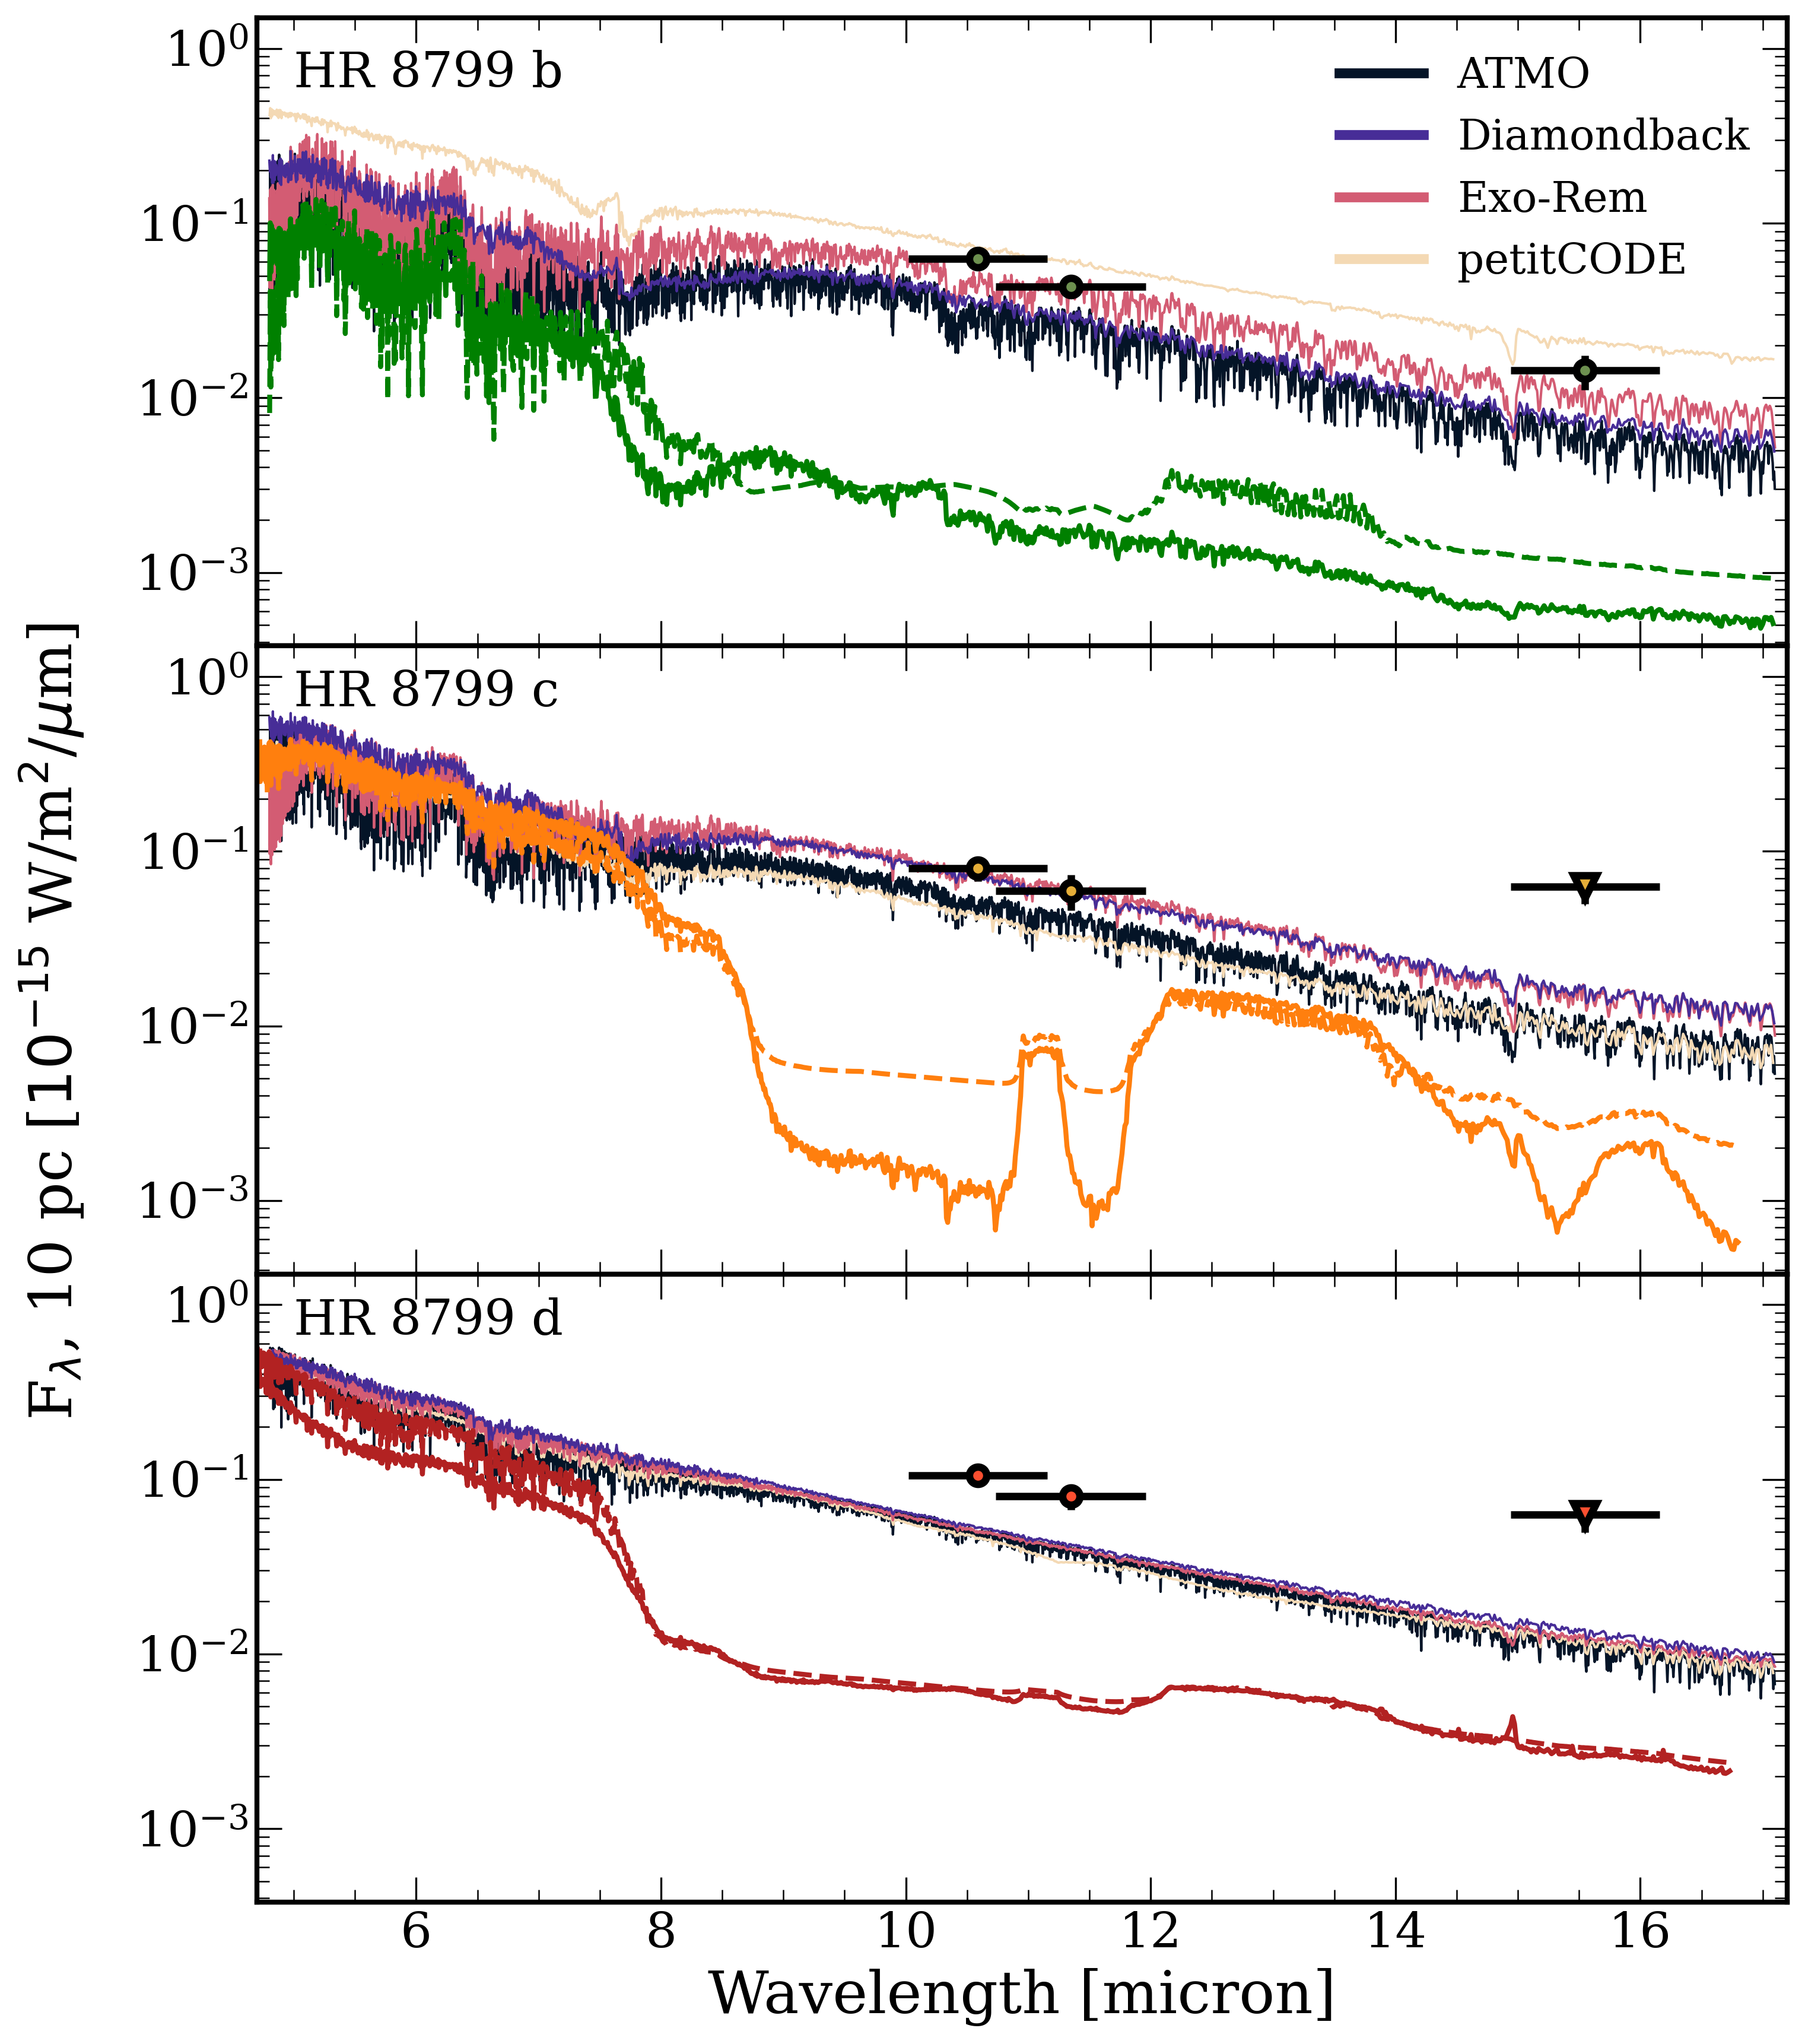

In [116]:
distance = 41.2925
fig, axes = plt.subplots(nrows=3,figsize = (10,12),sharex = True, gridspec_kw={'hspace':0})
ax = axes.flatten()
print(spectra.keys())
instruments = ['SPHERE', 'CHARIS', 'GPI', 'GRAVITY', 'ALES', 'OSIRIS']
planets = ["HR8799b","HR8799c","HR8799d","HR8799e"]
ax[2].set_xlabel('Wavelength [micron]',fontsize = 24)
fig.text(-0.03, 0.5, r'F$_{\lambda}$, 10 pc [$10^{-15}$ W/m$^{2}$/$\mu$m]', va='center', rotation='vertical', fontsize = 24)

model_dir = "/Users/nasedkin/Documents/Paper2_HR8799_Notebooks/grid_fit_spectra/"

qual_map = sc.ScicoSequential(cmap='heat')
fixed_cmap = qual_map.get_mpl_color_map()
model_colour_dict = {"exo-rem":fixed_cmap(6/10),
                     "diamondback":fixed_cmap(3/10),
                     "petrus2023":fixed_cmap(1/10),
                     "petitcode-hot-cloudy":fixed_cmap(9/10),
                     "petitcode-cool-cloudy":fixed_cmap(9/10)}

bfiles = sorted(glob(f"{model_dir}*HR 8799 b*"))
bfiles.reverse()
for f in bfiles:
        if not "3500" in f : continue
        if not "fitcorr" in f:continue
        if "cholla" in f:continue
        if "bobcat" in f:continue
        if not "BestFitChi2" in f:continue
        if 'petitcode-hot-cloudy' in f:continue

        wlen,spec = np.genfromtxt(f).T
        inds_short = np.where((wlen>4.8) & (wlen<17.1))
        model_name = f.split('/')[-1].split('_')[1]
        model_color = model_colour_dict[model_name]
        ax[0].plot(wlen[inds_short],spec[inds_short]*distance_scale/1e-15, color = model_color, linewidth = 1, alpha = 1)

        wlen_old = wlen

cfiles = sorted(glob(f"{model_dir}*HR 8799 c*")) 
cfiles.reverse()

for f in cfiles:
        #if "3500" in f: continue
        if not "3500" in f : continue
        if not "fitcorr" in f:continue
        if not "newales" in f:continue
        if "cholla" in f:continue
        if "bobcat" in f:continue
        if not "BestFitChi2" in f:continue
        wlen,spec = np.genfromtxt(f).T
        inds_short = np.where((wlen>4.8) & (wlen<17.1))  
        #if "3500" in f and "diamondback in f": 
        #        spec = spectres(wlen_old,wlen,spec)
        #        wlen = wlen_old
        model_name = f.split('/')[-1].split('_')[1]
        model_color = model_colour_dict[model_name]
        ax[1].plot(wlen[inds_short],spec[inds_short]*distance_scale/1e-15, color = model_color, linewidth = 1, alpha = 1)

        wlen_old = wlen
dfiles = sorted(glob(f"{model_dir}*HR 8799 d*"))
dfiles.reverse()

for f in dfiles:
        if not "3500" in f: continue
        if not "fitcorr" in f:continue
        if not "newales" in f:continue
        if not "scaled" in f:continue
        if not "BestFit" in f:continue
        if "cholla" in f:continue
        if "bobcat" in f:continue
        if 'petrus' in f:
                if not "BestFitChi2" in f:continue

        width = 1

        #if "exo-rem" in f:continue
        wlen,spec = np.genfromtxt(f).T
        inds_short = np.where((wlen>4.8) & (wlen<17.1))

        model_name = f.split('/')[-1].split('_')[1]
        model_color = model_colour_dict[model_name]
        ax[2].plot(wlen[inds_short],spec[inds_short]*distance_scale/1e-15, color = model_color, linewidth = width, alpha = 1)

inds_short = np.where((best_fit_specs_full[0][0]>4.8) & (best_fit_specs_full[0][0]<17.1))[0]

ax[0].plot(best_fit_specs_full[0][0,inds_short],
           best_fit_specs_full[0][1,inds_short]/1e-15, 
           color = 'green', 
           linewidth =2)

ax[1].plot(best_fit_specs_full[1][0,inds_short],
           best_fit_specs_full[1][1,inds_short]/1e-15, 
           color = 'tab:orange', 
           linewidth =2)
ax[2].plot(best_fit_specs_full[2][0,inds_short],
           best_fit_specs_full[2][1,inds_short]/1e-15, 
           color = 'firebrick', 
           linewidth =2)

ax[0].plot(best_fit_specs_free[0][0,inds_short],
           best_fit_specs_free[0][1,inds_short]/1e-15, 
           color = 'green', 
           linestyle = "--",
           linewidth =2)

ax[1].plot(best_fit_specs_free[1][0,inds_short],
           best_fit_specs_free[1][1,inds_short]/1e-15, 
           color = 'tab:orange',
           linestyle = "--", 
           linewidth =2)
ax[2].plot(best_fit_specs_free[2][0,inds_short],
           best_fit_specs_free[2][1,inds_short]/1e-15, 
           color = 'firebrick', 
           linestyle = "--",
           linewidth =2)

df = pd.read_csv("/Users/nasedkin/Documents/RetrievalResults/HR8799_2023_Retrievals/observations/hr8799b_photometry_updated_v2.txt",
                delimiter = ',',
                skiprows=1)
center = (df[" w_low"]+df[" w_high"])/2
lowerr = center- df[" w_low"]
higherr = df[" w_high"] - center

ax[0].errorbar(center, 
                df[" flux"]/1e-15 * (distance/10)**2, 
                xerr = [lowerr,higherr] ,
                yerr = df[" error"]/1e-15 * (distance/10)**2,
                linewidth = 0,
                elinewidth = 3,
                color=ret_colour_dict["HR8799b"],
                markeredgecolor='k',
                marker = 'o',
                ecolor='k',
                markeredgewidth = 3,
                markersize = 7,
                zorder = 10)

df = pd.read_csv("/Users/nasedkin/Documents/RetrievalResults/HR8799_2023_Retrievals/observations/hr8799c_photometry_updated_v2.txt",
                delimiter = ',',
                skiprows=1)
center = (df[" w_low"]+df[" w_high"])/2
lowerr = center- df[" w_low"]
higherr = df[" w_high"] - center
ax[1].errorbar(center[:-1], 
                df[" flux"][:-1]/1e-15 * (distance/10)**2, 
                xerr = [lowerr[:-1],higherr[:-1]] ,
                yerr = df[" error"][:-1]/1e-15 * (distance/10)**2,
                linewidth = 0,
                elinewidth = 3,
                color=ret_colour_dict["HR8799c"],
                markeredgecolor='k',
                marker = 'o',
                ecolor='k',
                markeredgewidth = 3,
                markersize = 7,
                zorder = 10)
ax[1].errorbar(center.iloc[-1], 
                df[" flux"].iloc[-1]/1e-15 * (distance/10)**2, 
                xerr = [[lowerr.iloc[-1]],[higherr.iloc[-1]]] ,
                yerr = [[df[" error"].iloc[-1]/1e-15 * (distance/10)**2],[0]],
                linewidth = 0,
                elinewidth = 3,
                color=ret_colour_dict["HR8799c"],
                markeredgecolor='k',
                marker = 'v',
                ecolor='k',
                markeredgewidth = 3,
                markersize = 9,
                zorder = 10)
df = pd.read_csv("/Users/nasedkin/Documents/RetrievalResults/HR8799_2023_Retrievals/observations/hr8799d_photometry_updated.txt",
                delimiter = ',',
                skiprows=1)
center = (df[" w_low"]+df[" w_high"])/2
lowerr = center- df[" w_low"]
higherr = df[" w_high"] - center
ax[2].errorbar(center[:-1], 
                df[" flux"][:-1]/1e-15 * (distance/10)**2, 
                xerr = [lowerr[:-1],higherr[:-1]] ,
                yerr = df[" error"][:-1]/1e-15 * (distance/10)**2,
                linewidth = 0,
                elinewidth = 3,
                color=ret_colour_dict["HR8799d"],
                markeredgecolor='k',
                marker = 'o',
                ecolor='k',
                markeredgewidth = 3,
                markersize = 7,
                zorder = 10)
ax[2].errorbar(center.iloc[-1], 
                df[" flux"].iloc[-1]/1e-15 * (distance/10)**2, 
                xerr = [[lowerr.iloc[-1]],[higherr.iloc[-1]]] ,
                yerr = [[df[" error"].iloc[-1]/1e-15 * (distance/10)**2],[0]],
                linewidth = 0,
                elinewidth = 3,
                color=ret_colour_dict["HR8799d"],
                markeredgecolor='k',
                marker = 'v',
                ecolor='k',
                markeredgewidth = 3,
                markersize = 9,
                zorder = 10)
ax[0].set_ylim(0.00038,1.5)
ax[1].set_ylim(0.00038,1.5)
ax[2].set_ylim(0.00038,1.5)

ax[0].set_yscale('log')
ax[1].set_yscale('log')
ax[2].set_yscale('log')
#ax[3].set_ylim(-0.6e-15,3.8e-15)


ax[0].set_xlim(4.7,17.2)
ax[1].set_xlim(4.7,17.2)
ax[2].set_xlim(4.7,17.2)
#ax[3].set_xlim(2.95,5.2)

ax[0].annotate("HR 8799 b",(5,0.4*ax[0].get_ylim()[1]),fontsize = 20, color ='k')
ax[1].annotate("HR 8799 c",(5,0.45*ax[1].get_ylim()[1]),fontsize = 20, color ='k')
ax[2].annotate("HR 8799 d",(5,0.45*ax[2].get_ylim()[1]),fontsize = 20, color ='k')






from matplotlib.ticker import AutoMinorLocator, LogLocator, NullFormatter,ScalarFormatter

#x_major = LogLocator(base=10.0, subs = (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16), numticks=4)
#ax[2].xaxis.set_major_locator(x_major)
"""ax[0].set_xscale('log')
ax[1].set_xscale('log')
ax[2].set_xscale('log')

x_minor = LogLocator(base=10, subs=np.arange(4, 20.25, 0.25))
ax[2].xaxis.set_minor_locator(x_minor)
ax[2].xaxis.set_minor_formatter(NullFormatter())
ax[2].set_xticks([5,6,7,8,9,10,11,12,13,14,15,16])
ax[2].get_xaxis().set_major_formatter(ScalarFormatter())"""

from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color=model_colour_dict["petrus2023"], lw=4),
                Line2D([0], [0], color=model_colour_dict["diamondback"], lw=4),
                Line2D([0], [0], color=model_colour_dict["exo-rem"], lw=4),   
                Line2D([0], [0], color=model_colour_dict["petitcode-hot-cloudy"], lw=4)
                ]
ax[0].legend(custom_lines, ['ATMO', 'Diamondback', 'Exo-Rem', 'petitCODE'],loc = 'upper right',fontsize=17,frameon=False)
plt.savefig(f"plots/HR8799bcd_PredictedMRS_gridfits_{version}.pdf",bbox_inches='tight')

In [77]:
df = pd.read_csv("/Users/nasedkin/Documents/RetrievalResults/HR8799_2023_Retrievals/observations/hr8799b_photometry_updated_v2.txt",
                delimiter = ',',
                skiprows=1)

df[" w_low"],df[" flux"]* (41.2925/10)**2,df[" error"]* (41.2925/10)**2


(0      1.437522
 1      1.940466
 2      4.461482
 3      3.400000
 4      3.986000
 5      1.081000
 6      1.537000
 7      1.585000
 8      2.024000
 9      2.152000
 10     0.973286
 11    10.022673
 12    10.735790
 13    14.941367
 Name:  w_low, dtype: float64,
 0     2.128388e-14
 1     2.030227e-14
 2     2.577475e-15
 3     9.479750e-15
 4     1.362288e-14
 5     1.134813e-14
 6     2.230941e-14
 7     2.491731e-14
 8     1.949538e-14
 9     1.775853e-14
 10    5.619400e-15
 11    6.263637e-17
 12    4.334260e-17
 13    1.431459e-17
 Name:  flux, dtype: float64,
 0     1.766308e-15
 1     1.497280e-15
 2     7.212796e-16
 3     8.743522e-16
 4     2.268844e-15
 5     9.417589e-16
 6     2.884660e-15
 7     2.298215e-15
 8     1.077903e-15
 9     1.473745e-15
 10    1.518852e-15
 11    2.065556e-18
 12    2.831620e-18
 13    3.210404e-18
 Name:  error, dtype: float64)

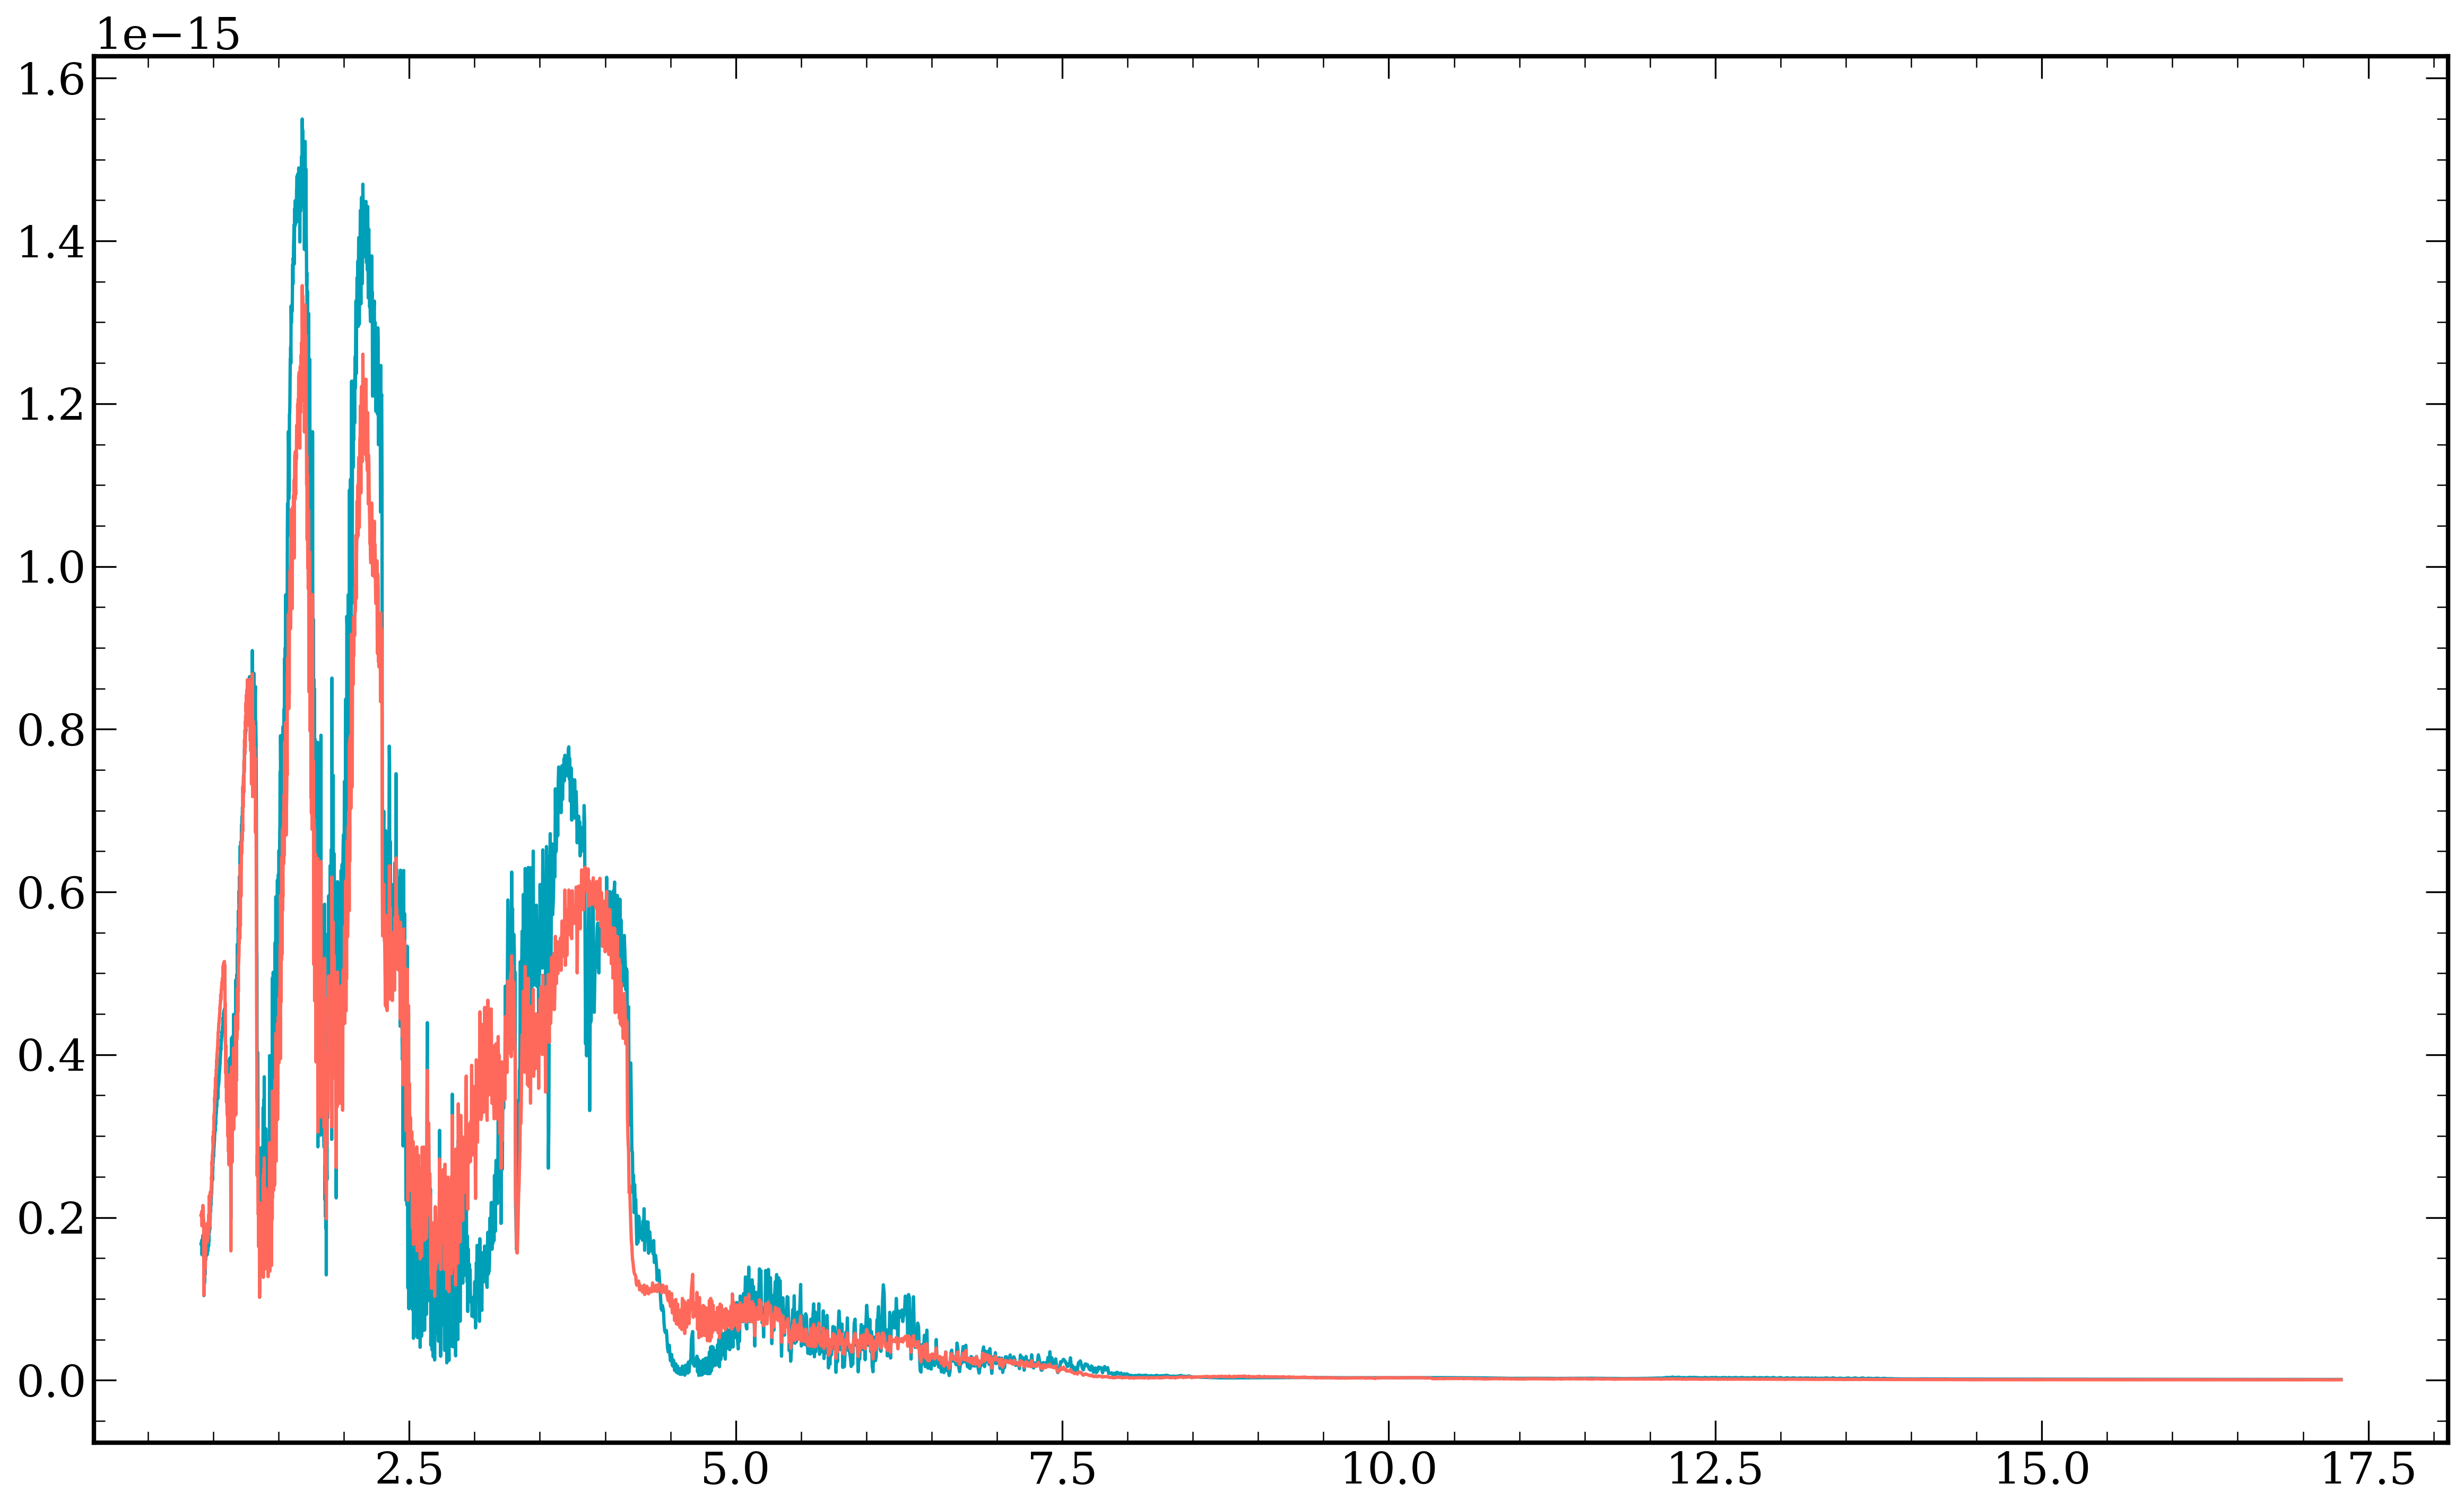

In [111]:
plt.plot(best_fit_specs_free[0][0],best_fit_specs_free[0][1])
plt.plot(best_fit_specs_free[0][0],best_fit_specs_full[0][1])